In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gpplot as gpp
gpp.set_aesthetics(context = 'paper')

In [2]:
file_path = '../../Data/cleanedData/'
figure3_outpath = '../../Figures/Figure 3/'

NewDatasetCombine = pd.read_csv(file_path + 'CombinedCleanedDatasets.csv', low_memory=False)
NewDatasetCombine

,Target Gene Symbol,chromosome,sgRNA Sequence,sgRNA Context Sequence,sgRNA 'Cut' Position,Strand of Target,TSS Position,sgRNA 'Cut' Site TSS Offset,Phenotype scores-ave_Rep1_Rep2,Avg_LFC-Tfinal,z-score relative to NC,condition,Domain,DataSet,zscoreRelativeNC_signed,Avg_LFC_signed,z_scored_avg_lfc,cellDomainDataSet,z_score
0,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,45388577.0,667.0,NaN,NaN,NaN,A549,Kox1,InHouse,NaN,NaN,-0.398339,A549_Kox1_InHouse,-0.398339
1,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,45388577.0,667.0,NaN,NaN,NaN,A549,Zim3,InHouse,NaN,NaN,-0.841793,A549_Zim3_InHouse,-0.841793
2,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,45388577.0,667.0,NaN,NaN,NaN,HCT116,Zim3,InHouse,NaN,NaN,-0.992358,HCT116_Zim3_InHouse,-0.992358
3,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,83284798.0,-888.0,NaN,NaN,NaN,A549,Kox1,InHouse,NaN,NaN,0.044728,A549_Kox1_InHouse,0.044728
4,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,83284798.0,-888.0,NaN,NaN,NaN,A549,Zim3,InHouse,NaN,NaN,-0.190308,A549_Zim3_InHouse,-0.190308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257411,WDR11,chr10,gctaggacctctactacaatgaa,GGCTAGGACCTCTACTACAATGAATGGGAG,120855890.0,+,120851363.0,4527.0,NaN,NaN,NaN,K562,Kox1,Gilbert,0.387317,0.354061,NaN,K562_Kox1_Gilbert,0.387317
257412,WDR11,chr10,gctaggacctctactacaatgaat,GCTAGGACCTCTACTACAATGAATGGGAGA,120855891.0,+,120851363.0,4528.0,NaN,NaN,NaN,K562,Kox1,Gilbert,-0.782858,-0.048063,NaN,K562_Kox1_Gilbert,-0.782858
257413,WDR11,chr10,gtctttcatcaagtctgatgta,CAGTCTTTCATCAAGTCTGATGTAAGGTAT,120855971.0,+,120851363.0,4608.0,NaN,NaN,NaN,K562,Kox1,Gilbert,1.429277,0.712125,NaN,K562_Kox1_Gilbert,1.429277
257414,WDR11,chr10,gtaggtccaagtttcagtc,TTTATGTAGGTCCAAGTTTCAGTCTGGTAT,120856094.0,+,120851363.0,4731.0,NaN,NaN,NaN,K562,Kox1,Gilbert,0.553328,0.411110,NaN,K562_Kox1_Gilbert,0.553328


In [3]:
# Create intervals of 25 between -225 and 225
interval_25 = list(range(-225, 250, 25))

# Create intervals to ensure -1000 falls into [-1000, -250)
interval_100_lower_5kb = [-2500, -1750, -1000]
interval_100_upper_5kb = list(range(250, 2501, 750))

interval_100_lower_1kb = [-1000,  -250]
interval_100_upper_1kb = [250,  1000]

# Combine all intervals with boundaries for extremes
cut_list_5kb = [-5000] + interval_100_lower_5kb + interval_25 + interval_100_upper_5kb + [5000]
cut_list_1kb = interval_100_lower_1kb +  interval_25 + interval_100_upper_1kb

# Create labels based on the new cut_list
labels_5kb = [f'[{cut_list_5kb[i]}, {cut_list_5kb[i+1]})' for i in range(len(cut_list_5kb)-1)]
labels_1kb = [f'[{cut_list_1kb[i]}, {cut_list_1kb[i+1]})' for i in range(len(cut_list_1kb)-1)]

print("cut_list:", cut_list_5kb)
print("labels:", labels_5kb)
print("cut_list:", cut_list_1kb)
print("labels:", labels_1kb)

cut_list: [-5000, -2500, -1750, -1000, -225, -200, -175, -150, -125, -100, -75, -50, -25, 0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 1000, 1750, 2500, 5000]
labels: ['[-5000, -2500)', '[-2500, -1750)', '[-1750, -1000)', '[-1000, -225)', '[-225, -200)', '[-200, -175)', '[-175, -150)', '[-150, -125)', '[-125, -100)', '[-100, -75)', '[-75, -50)', '[-50, -25)', '[-25, 0)', '[0, 25)', '[25, 50)', '[50, 75)', '[75, 100)', '[100, 125)', '[125, 150)', '[150, 175)', '[175, 200)', '[200, 225)', '[225, 250)', '[250, 1000)', '[1000, 1750)', '[1750, 2500)', '[2500, 5000)']
cut_list: [-1000, -250, -225, -200, -175, -150, -125, -100, -75, -50, -25, 0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 1000]
labels: ['[-1000, -250)', '[-250, -225)', '[-225, -200)', '[-200, -175)', '[-175, -150)', '[-150, -125)', '[-125, -100)', '[-100, -75)', '[-75, -50)', '[-50, -25)', '[-25, 0)', '[0, 25)', '[25, 50)', '[50, 75)', '[75, 100)', '[100, 125)', '[125, 150)', '[150, 175)', '[175, 200)', '[200, 225)', 

In [4]:
# bin TSS offset using these intervals
NewDatasetCombine['TSS Bucket (-5kb to 5kb)'] = pd.cut(NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'], 
                                         cut_list_5kb[:-1], labels=labels_5kb[:-1], right=False)
NewDatasetCombine['TSS Bucket (-5kb to 5kb)'] = np.where(
    NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'] >= cut_list_5kb[-2],
    pd.cut(NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'], bins=cut_list_5kb[-2:], labels=[labels_5kb[-1]], right=True),
    NewDatasetCombine['TSS Bucket (-5kb to 5kb)']
)

In [5]:
NewDatasetCombine['TSS Bucket (-1kb to 1kb)'] = pd.cut(NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'], 
                                         cut_list_1kb[:-1], labels=labels_1kb[:-1], right=False)
NewDatasetCombine['TSS Bucket (-1kb to 1kb)'] = np.where(
    NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'] >= cut_list_1kb[-2],
    pd.cut(NewDatasetCombine['sgRNA \'Cut\' Site TSS Offset'], bins=cut_list_1kb[-2:], labels=[labels_1kb[-1]], right=True),
    NewDatasetCombine['TSS Bucket (-1kb to 1kb)']
)

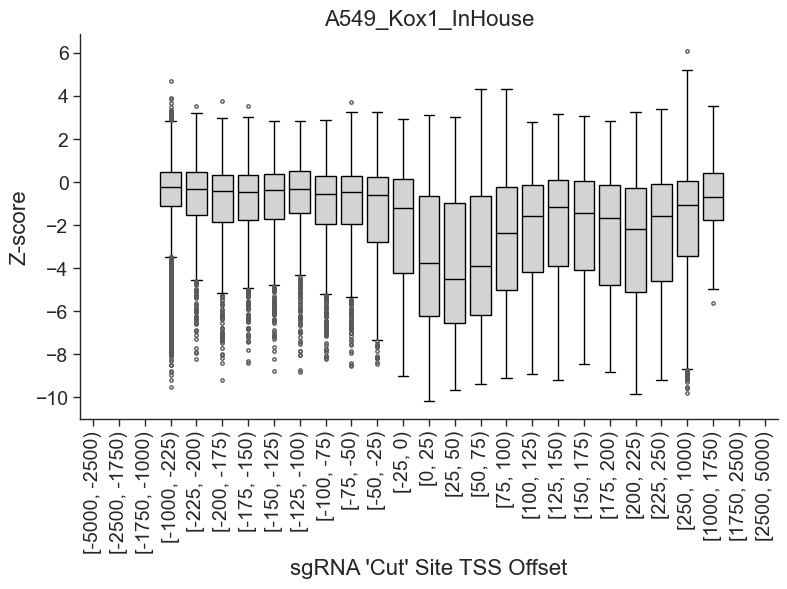

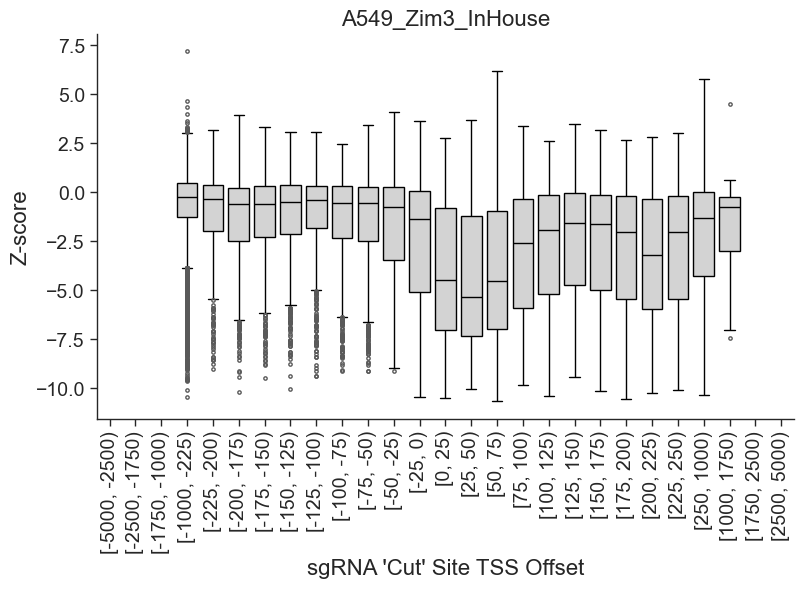

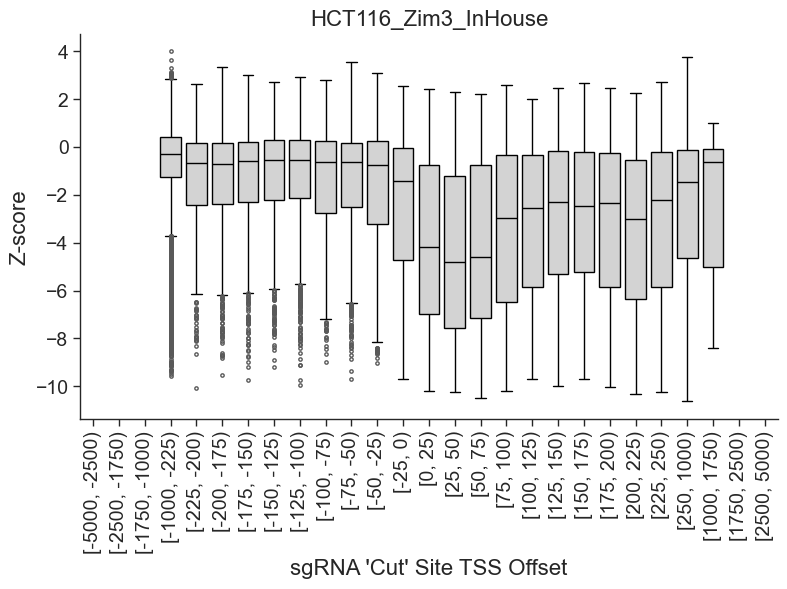

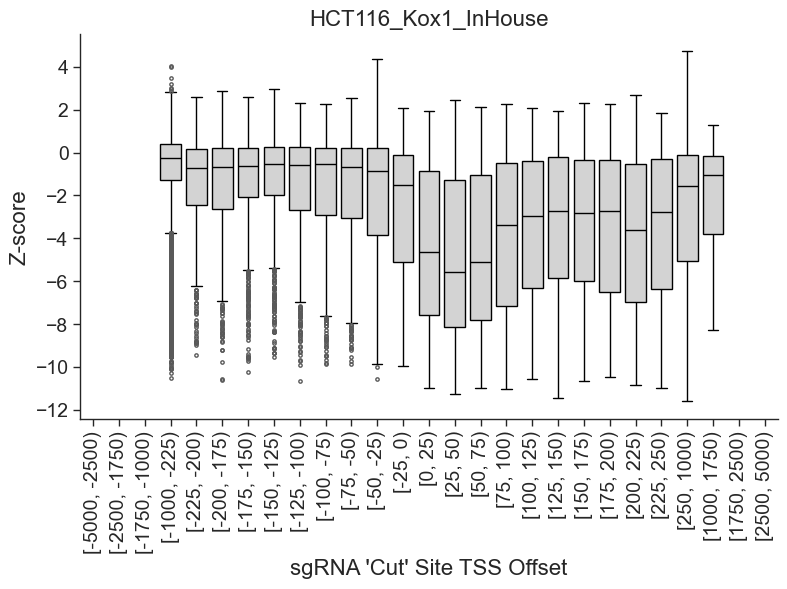

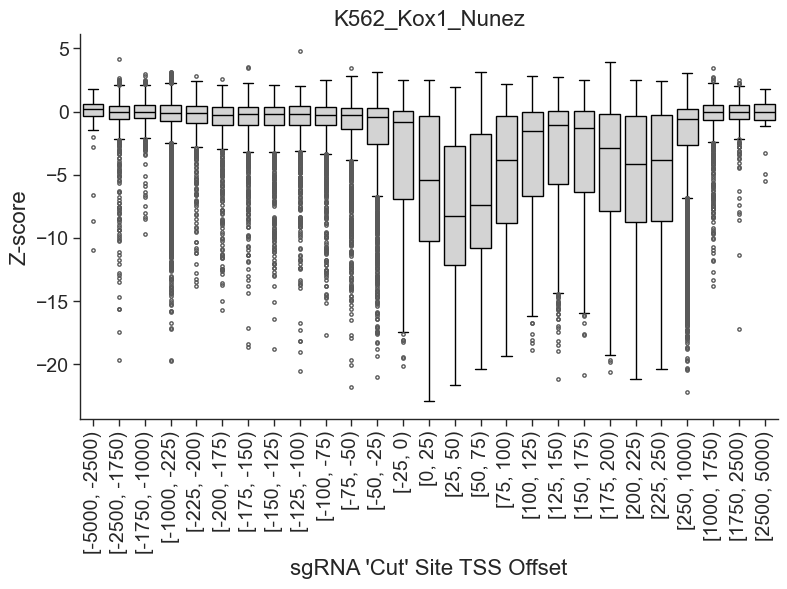

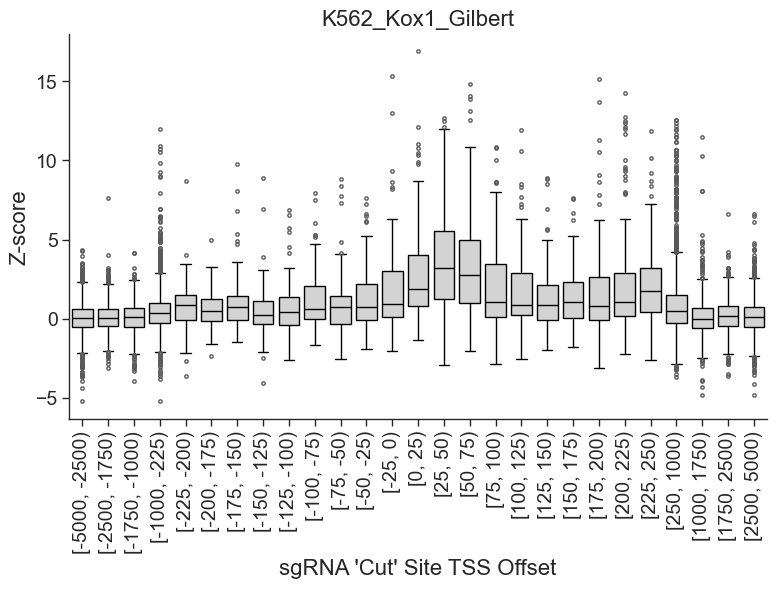

In [6]:
for unique_set in NewDatasetCombine['cellDomainDataSet'].unique():
    SubsetNewDatasetCombine = NewDatasetCombine[NewDatasetCombine['cellDomainDataSet']== unique_set]
    plt.figure(figsize=(9, 5))
    ax = sns.boxplot(data=SubsetNewDatasetCombine, x='TSS Bucket (-5kb to 5kb)', 
                y='z_score',  boxprops=dict(facecolor='lightgrey', edgecolor='black'),
                 whiskerprops=dict(color='black'),  # Whisker line color
                 capprops=dict(color='black'),  # Cap line color
                 medianprops=dict(color='black'), 
    flierprops={"marker": "."}, order = labels_5kb)
    for line in ax.lines:
        line.set_linewidth(1)  # Set whisker, cap, and median line width (increase the value as needed)

    plt.xlabel('sgRNA \'Cut\' Site TSS Offset',fontsize=16)
    plt.ylabel('Z-score',fontsize=16)
    plt.title(unique_set,fontsize=16)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)

    sns.despine()

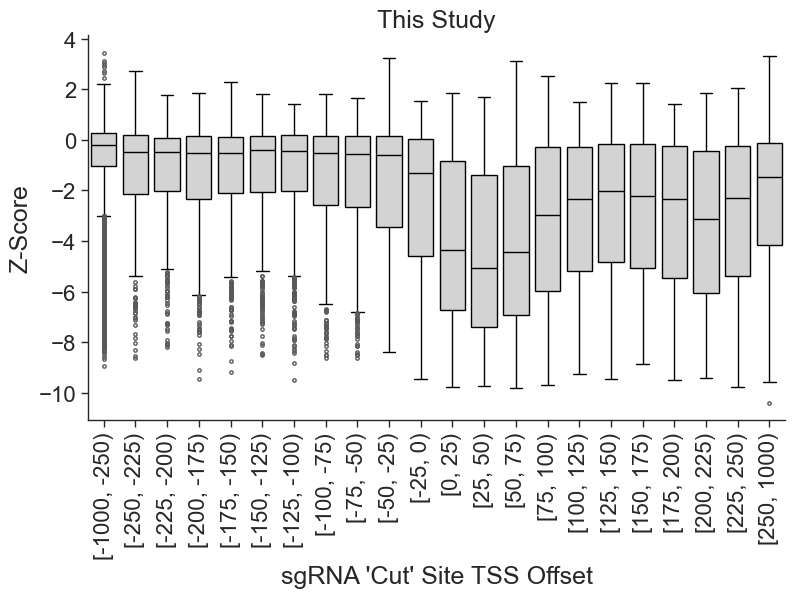

In [7]:
inhouse_df = NewDatasetCombine[NewDatasetCombine['DataSet'] == 'InHouse']
inhouse_df_ess = inhouse_df[~inhouse_df['z_score'].isna()]

plot_df = inhouse_df_ess.groupby(['sgRNA Context Sequence',
                                  'TSS Bucket (-1kb to 1kb)']).agg(mean_z_score = ('z_score','mean'),
                                                                   num_datasets = ('cellDomainDataSet','nunique')).reset_index()
plot_df = plot_df[plot_df['num_datasets'] == 4]
plot_df

plt.figure(figsize=(9, 5))
ax = sns.boxplot(data=plot_df, x='TSS Bucket (-1kb to 1kb)', 
            y='mean_z_score',  boxprops=dict(facecolor='lightgrey', edgecolor='black'),
             whiskerprops=dict(color='black'),  # Whisker line color
             capprops=dict(color='black'),  # Cap line color
             medianprops=dict(color='black'), 
flierprops={"marker": "."}, order = labels_1kb)
for line in ax.lines:
    line.set_linewidth(1)  # Set whisker, cap, and median line width (increase the value as needed)

plt.xlabel('sgRNA \'Cut\' Site TSS Offset',fontsize=18)
plt.ylabel('Z-Score',fontsize=18)
plt.title('This Study',fontsize=18)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)

sns.despine()

gpp.savefig(figure3_outpath + "TSS_offset_inhouse_averaged.pdf", dpi=300, bbox_inches='tight')

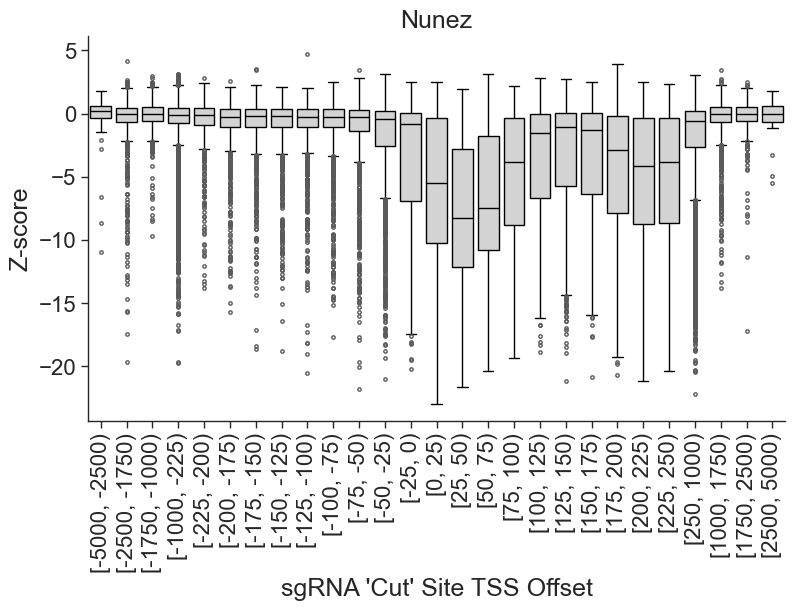

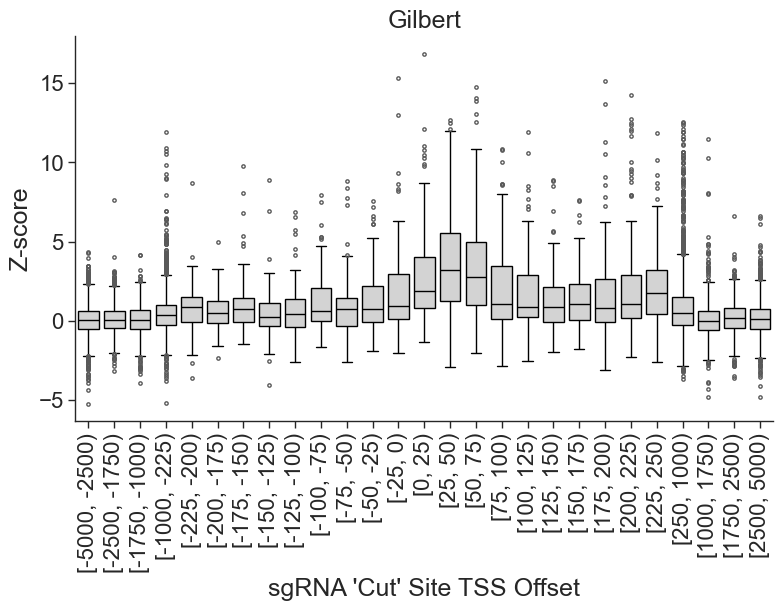

In [8]:
for unique_set in ['K562_Kox1_Nunez','K562_Kox1_Gilbert']:
    SubsetNewDatasetCombine = NewDatasetCombine[NewDatasetCombine['cellDomainDataSet']== unique_set]
    plt.figure(figsize=(9, 5))
    ax = sns.boxplot(data=SubsetNewDatasetCombine, x='TSS Bucket (-5kb to 5kb)', 
                y='z_score',  boxprops=dict(facecolor='lightgrey', edgecolor='black'),
                 whiskerprops=dict(color='black'),  # Whisker line color
                 capprops=dict(color='black'),  # Cap line color
                 medianprops=dict(color='black'), 
    flierprops={"marker": "."}, order = labels_5kb)
    for line in ax.lines:
        line.set_linewidth(1)  # Set whisker, cap, and median line width (increase the value as needed)

    plt.xlabel('sgRNA \'Cut\' Site TSS Offset',fontsize=18)
    plt.ylabel('Z-score',fontsize=18)
    plt.title(unique_set.split('_')[2],fontsize=18)
    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=16)

    sns.despine()

    gpp.savefig(figure3_outpath + "TSS_offset_" + unique_set + ".pdf", dpi=300, bbox_inches='tight')